In [1]:
## Do Imports
import preprocess as pp
import h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import string
%matplotlib inline 

In [2]:
df_wt_init, df_hd_init, df_wt_passive_init, df_hd_passive_init = pp.get_data()
  


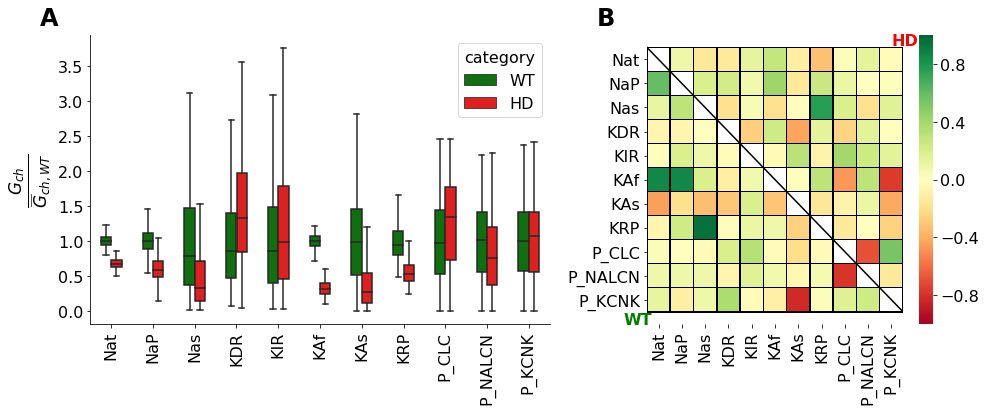

In [3]:
import seaborn as sns
import matplotlib.ticker as mtick
#sns.set(style="ticks")
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
df_2 = [df_wt_init,df_hd_init]
df_new = pd.concat(df_2)
cols=['Nat','NaP','Nas','KDR','KIR','KAf','KAs','KRP','P_CLC',
      'P_NALCN','P_KCNK', 'category']
df_new = df_new.loc[:,cols]

my_pallete = {'WT': 'g', 'HD': 'r'}
fig = plt.figure(figsize = (14, 6))
gs = fig.add_gridspec(1, 7)
ax = fig.add_subplot(gs[0, 0:4])
ax.annotate('A', xy=(0, 1), 
                xycoords='axes fraction', 
                size=24, xytext=(-50, 10), 
                    textcoords='offset pixels', weight = 'bold') 

from sklearn.preprocessing import StandardScaler
df_new_scaled = ( (df_new.iloc[:, :-1]/ df_wt_init[['Nat','NaP','Nas','KDR','KIR','KAf','KAs','KRP','P_CLC',
      'P_NALCN','P_KCNK']].mean())/1).values
df_new_scaled = pd.DataFrame(np.hstack((df_new_scaled, 
                                        df_new.iloc[:, -1].values.reshape(-1, 1))), 
                            columns = df_new.columns)



df_melt = df_new_scaled.melt(id_vars = 'category',
                  value_vars = ['Nat', 'NaP', 'Nas', 'KDR', 'KIR', 'KAf', 
                                'KAs', 'KRP', 'P_CLC', 'P_NALCN', 'P_KCNK'],
                  var_name = 'columns')
df_melt.head()
sns.boxplot(data = df_melt,
            hue = 'category', # different colors for different 'cls'
            x = 'columns',
            y = 'value',
            order = ['Nat', 'NaP', 'Nas', 'KDR', 'KIR', 'KAf', 
                     'KAs', 'KRP', 'P_CLC', 'P_NALCN', 'P_KCNK'],
            showfliers = False, ax = ax, palette = my_pallete, width = 0.5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'$\frac{G_{ch}}{{\widebar{G}_{ch, WT}}}$', fontsize = 24)

ax = fig.add_subplot(gs[0, 4:])
corr1 = df_wt_init.iloc[:, 0:11].corr()
corr2 = df_hd_init.iloc[:, 0:11].corr()
sns.heatmap(corr1, cmap = 'RdYlGn', ax = ax,
            mask = np.triu(np.ones_like(corr1, dtype=np.bool)),
            vmin = -1, vmax = 1, linewidth = 0.5, linecolor = 'k')
sns.heatmap(corr2, cmap = 'RdYlGn', ax = ax,
            mask = np.tril(np.ones_like(corr2, dtype=np.bool)),
            vmin = -1, vmax = 1, cbar = False, 
            linewidth = 0.5, linecolor = 'k')
ax.annotate('B', xy=(0, 1), 
            xycoords='axes fraction', 
            size=24, xytext=(-50, 10), 
            textcoords='offset pixels', weight = 'bold') 
ax.plot(np.arange(0, 12), np.arange(0, 12), 'k-')

ax.text(-1, 11.5, 'WT', color = 'g', fontweight = 'bold')
ax.text(10.5, -0.1, 'HD', color = 'r', fontweight = 'bold')
ax.set_ylim([11.5,-0.5])
fig.tight_layout()


In [ ]:
## Supplemental-Figure Linear Regression Analysis

/Users/sushmitaallam/Box/MSN Paper/ClinicalPharmacologyandTherapeutics/Figures/Figure_generation_SourceCode


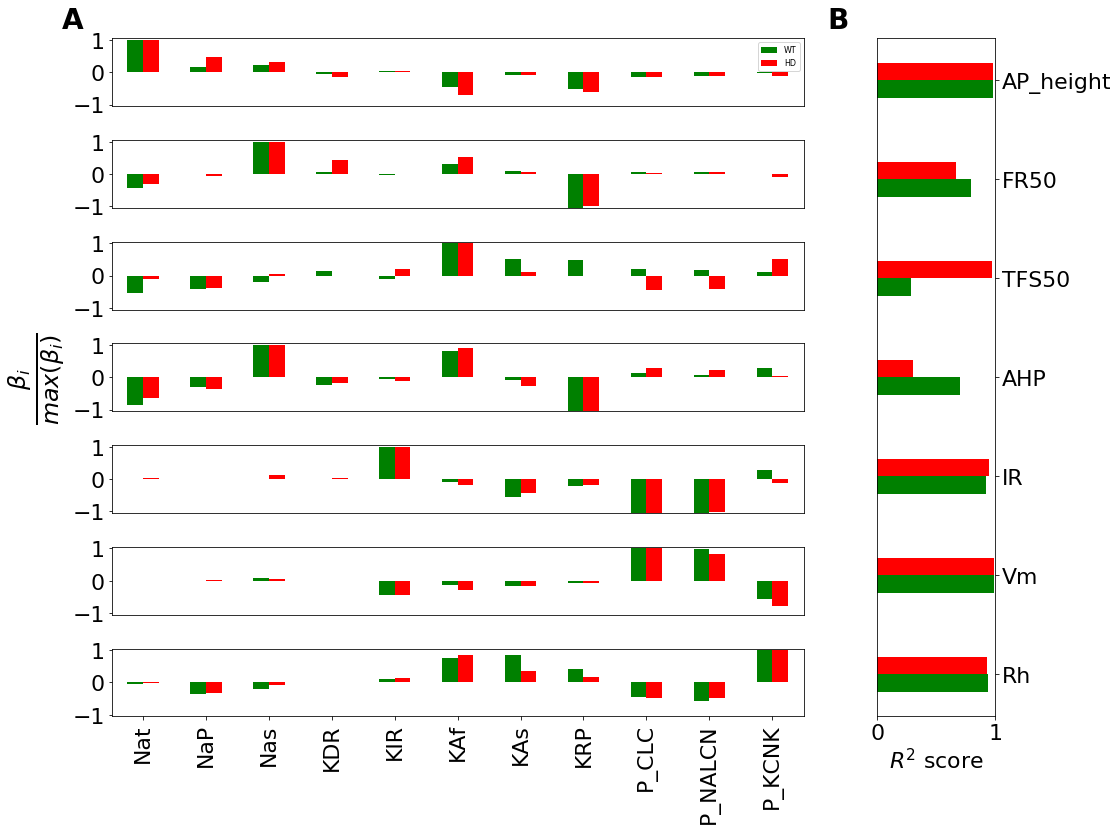

In [6]:
xlabels = ['AP_height', 'FR50', 'TFS50', 'AHP', 'IR', 'Vm', 'Rh']
fs =24
matplotlib.rcParams.update({'font.size': 22})
from sklearn.preprocessing import StandardScaler
pars_wt = StandardScaler().fit_transform(df_wt_init.iloc[:, 0:11])
feats_wt = StandardScaler().fit_transform(df_wt_init.loc[:, xlabels])
pars_hd = StandardScaler().fit_transform(df_hd_init.iloc[:, 0:11])
feats_hd = StandardScaler().fit_transform(df_hd_init.loc[:, xlabels])
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize = (16, 12))
gs = fig.add_gridspec(1, 5)
gs0 = gs[:, 0:4].subgridspec(7, 1, hspace = 0.5)
score = []
for ii in np.arange(feats_wt.shape[1]):
  coef = []
  ax = fig.add_subplot(gs0[ii, 0])
  lmwt = LinearRegression().fit(pars_wt, feats_wt[:, ii])
  lmhd = LinearRegression().fit(pars_hd, feats_hd[:, ii])
  coef.append([lmwt.coef_.tolist(), lmhd.coef_.tolist()])
  score.append([lmwt.score(pars_wt, feats_wt[:, ii]), 
                lmhd.score(pars_hd, feats_hd[:, ii])])
  df = pd.DataFrame(coef[0]).T
  df = df/df.max() ## comment out to not scale by maximum
  df.index = df_wt_init.iloc[:, 0:11].columns
  df.columns = ['WT', 'HD']
  df.plot(kind = 'bar', color = ['g', 'r'], ax = ax,  width = 0.5)
  #ax.set_title(xlabels[ii], fontsize = fs, fontweight = 'bold')
  if ii == 0:
    ax.legend(prop = {'size': 8})
    ax.annotate('A', xy=(0, 1), 
            xycoords='axes fraction', 
            size=28, xytext=(-50, 10), 
            textcoords='offset pixels', weight = 'bold') 
  if ii >0:
    ax.get_legend().remove()
  if ii < 6:
    ax.get_xaxis().set_ticks([])
  ax.set_ylim([-1.05, 1.05])
  if ii == 3:
    ax.set_ylabel(r'$\frac{\beta_{i}}{max(\beta_{i})}$', fontsize = fs + 10)
  fig.tight_layout()
df2 = pd.DataFrame(score)
df2.columns = ['WT', 'HD']
df2.index = xlabels
df2
ax = fig.add_subplot(gs[4])
df2[::-1].plot(kind = 'barh', color = ['g', 'r'], ax = ax, legend = False, 
               width = 0.35)
ax.annotate('B', xy=(0, 1), 
            xycoords='axes fraction', 
            size=28, xytext=(-50, 10), 
            textcoords='offset pixels', weight = 'bold') 
ax.yaxis.tick_right()
ax.set_xlim([0, 1])
ax.set_xlabel('$R^2$ score')
fig.tight_layout()
fig.savefig('Supp_Fig_LinearReg.pdf')
